# Task 2: Dimensionality Reduction Methods

Alex Rivera ID#011243153

Western Governors University

D212 - Data Mining  II 

November 09, 2023

## A1: Proposal Of Question

The research question for this project is, "Can Principal Component Analysis assist in reducing the customer churn dataset while maintaining significant variance?"

## A2: Defined Goal

The goal of the analysis is to apply PCA to the dataset with a target of 80% total variance. Reducing the amounts of dimensions while maintaining the majority of the information will help in simplifying future machine learning models. The added benefit of running faster models will gain efficiencies while exploring the data. Through the PCA method process, PCA will also reduce the overfitting of the models by eliminating features with high correlation (Lindgren, 2020).

## B1: Explanation Of PCA

The principal component analysis is a simple dimensionality reduction method that can be applied to a large dataset and reduced into smaller portions while preserving as much information as possible. Jaadi's article gave a 4 step overview of the Principal component analysis method: standardization, covariance matrix computation, compute the eigenvectors, and eigenvalues of the covariance matrix to identify the principal components and feature vector (Jaadi, 2023). First standardization is done to standardize all the continuous initial variables by applying the following formula to the dataset:

(value-value.mean())/value.std()

Standardization removes any differences in scales between the variables, without standardization, this could lead to bias. The second step to perform is covariance matrix computation. Jaadi describes this step as, "to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them"(Jaadi, 2023). The covariance matrix captures this relationship between it is a, "p × p symmetric matrix (where p is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables" (Jaadi, 2023). Third, computing the eigenvectors and eigenvalues from the covariance matrix to determine the principal components. A breakdown of the significance of these two values is quoted below:

    Eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance (most information) and that we call Principal Components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component (Jaadi, 2023).
    
Once computed ranking the eigenvectors by the eigenvalues in ascending order ranks the principal components by significance. The final step is the expected outcome of the PCA the feature vector. In the final step, the principal components are kept or discarded by significance by the Kaiser rule where eigenvalues values less than 1 are discarded. The final principal components with eigenvalues greater than 1 are the reduced dimensions that preserved the most information in the dataset. 

## B2: PCA Assumption

The main assumption for Principal Component Analysis according to Vaidya is, "PCA assumes that the relationship between variables in the dataset is linear. It works best when the variables exhibit a linear correlation pattern" (Vaidya, n.d.). 
According to this assumption, PCA would not be accurate in non-linear relationships. Multiple steps of the PCA method are rooted in linear algebra, I believe this would negatively impact or fail in computing principal components.

## C1: Continuous Data Set Variables

* Lat
* Lng
* Population
* Children
* Age
* Income
* Outage_sec_perweek
* Email
* Contacts
* Yearly_equip_failure
* Tenure
* MonthlyCharge
* Bandwidth_GB_Year

## C2: Standardization Of Data Set Variables

My previous D206 project was referenced throughout this task(Rivera, 2023) and Middleton's Webinar 4(Middleton, 2023).

In [1]:
#Importing necessary packages for PCA analysis 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#Loading the churn dataset flat file into a pandas dataframe 
churn = pd.read_csv('C:/Users/alexa/WGU/D212/Project/churn_clean.csv', index_col=0)

In [3]:
#Storing variables for principal component analysis
churn_pca = churn[['Lat','Lng','Population','Children','Age','Income','Outage_sec_perweek','Email',
                   'Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']]

In [4]:
#Normalizing churn data for PCA
churn_pca_normalized = (churn_pca-churn_pca.mean())/churn_pca.std()

In [5]:
#Save prepared PCA dataset to CSV 
churn_pca_normalized.to_csv('C:/Users/alexa/WGU/D212/Project/PCA_Prepared_Data.csv', index=False)

## D1: Principal Components

My previous D206 project was referenced throughout this task(Rivera, 2023) and Middleton's Webinar 4(Middleton, 2023).

In [6]:
#Create PCA object
pca = PCA(n_components=churn_pca.shape[1])
pca.fit(churn_pca_normalized)
print(pca)

PCA(n_components=13)


In [7]:
#Creating dataframe to have the ability to print the churn PCA data
churn_pca_print = pd.DataFrame(pca.transform(churn_pca_normalized),
                               columns=['PC1','PC2','PC3','PC4','PC5','PC6',
                                        'PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
#Creating dataframe for PCA loading
pca_loadings = pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4','PC5','PC6',
                                        'PC7','PC8','PC9','PC10','PC11','PC12','PC13'],
                                        index=churn_pca_normalized.columns)
#Calling pca_loading to review output
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Lat,-0.023161,-0.714010,-0.031715,0.109414,-0.094872,-0.030887,-0.010719,-0.020375,0.090273,0.018619,0.053958,0.674376,0.001077
Lng,0.007911,0.180879,-0.285753,-0.736871,0.344620,-0.087695,-0.052349,-0.086499,-0.172285,-0.151301,-0.112280,0.375138,0.000788
Population,-0.001230,0.653439,0.151916,0.322012,-0.119517,0.098791,0.053682,0.079161,-0.027392,0.055304,0.100818,0.631729,-0.000070
Children,0.014244,-0.014267,0.447882,-0.464670,-0.107498,0.130597,0.034812,-0.065531,0.192459,0.437471,0.565626,-0.011794,-0.021597
Age,0.001860,0.052795,-0.443537,0.227235,0.436759,-0.096321,-0.188399,0.093484,0.342892,-0.083596,0.614892,-0.037729,0.022360
Income,0.004185,-0.054602,0.195742,-0.041772,0.312779,0.100371,0.773549,0.335467,0.246663,-0.275852,-0.033742,0.006645,-0.000941
Outage_sec_perweek,0.005811,0.009174,-0.249550,-0.126214,-0.455981,0.597523,0.051915,-0.184658,0.057056,-0.515406,0.223304,-0.034155,0.000271
Email,-0.020020,0.152355,-0.092711,-0.144998,-0.353186,-0.403463,0.003835,-0.125375,0.760622,-0.052146,-0.247985,0.027357,0.000274
Contacts,0.004283,0.031043,-0.447906,0.108875,0.011245,0.082442,0.519791,-0.510974,-0.052695,0.494601,-0.028194,-0.011878,-0.000947
Yearly_equip_failure,0.017665,-0.007070,0.153686,0.063449,0.420468,0.592380,-0.290766,-0.194665,0.397088,0.143419,-0.376943,0.038880,-0.000083


## D2: Identification Of The Total Number Of Components

My previous D206 project was referenced throughout this task(Rivera, 2023) and Middleton's Webinar 4(Middleton, 2023).

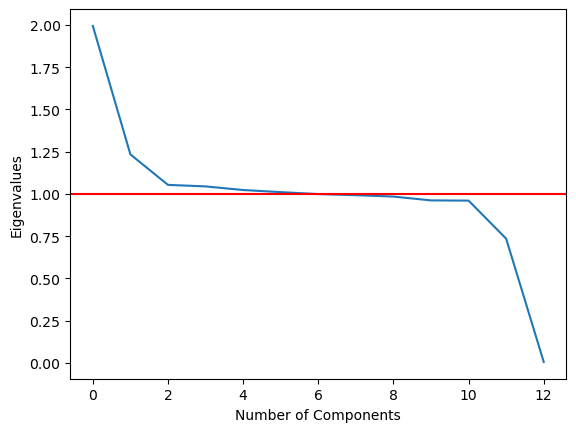

In [8]:
#Matrix and eigenvalues calculations
cov_matrix = np.dot(churn_pca_normalized.T, churn_pca_normalized) / churn_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix,eigenvector)) for eigenvector in pca.components_]

#Plotting eigenvalues for review 
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color="red")
plt.show()

In [9]:
#Calling eigenvalues to review data as components 5-7 are close to 1
eigenvalues

[1.9945059913117236,
 1.233904646544768,
 1.0535590324986521,
 1.0444855803335458,
 1.0230834286706352,
 1.0105796740381758,
 0.9991027291741811,
 0.9924766568011136,
 0.9843341591241257,
 0.9616940372673229,
 0.9603032200514295,
 0.7352058830233161,
 0.005464961161403633]

In [10]:
#Kaiser criterion - running for loop to count eigenvalues greater or equal to one 
pca_count = 0
for i in eigenvalues:
    if i >=1:
        pca_count+=1

print("Per Kaiser criterion, final number of principal components: " + str(pca_count))

Per Kaiser criterion, final number of principal components: 6


In [11]:
#Create final PCA object
final_pca = PCA(n_components=6)
final_pca.fit(churn_pca_normalized)
print(final_pca)

PCA(n_components=6)


In [12]:
#Final principal component columns
pc_cols=['PC1','PC2','PC3','PC4','PC5','PC6']

#Creating dataframe to have the ability to print the churn PCA data
churn_pca_print = pd.DataFrame(final_pca.transform(churn_pca_normalized),
                               columns=pc_cols)
#Creating dataframe for PCA loading
final_pca_loadings = pd.DataFrame(final_pca.components_.T,columns=pc_cols,
                                        index=churn_pca_normalized.columns)
#Calling final_pca_loadings to review output
final_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Lat,-0.023161,-0.714010,-0.031715,0.109414,-0.094872,-0.030887
Lng,0.007911,0.180879,-0.285753,-0.736871,0.344620,-0.087695
Population,-0.001230,0.653439,0.151916,0.322012,-0.119517,0.098791
Children,0.014244,-0.014267,0.447882,-0.464670,-0.107498,0.130597
Age,0.001860,0.052795,-0.443537,0.227235,0.436759,-0.096321
Income,0.004185,-0.054602,0.195742,-0.041772,0.312779,0.100371
Outage_sec_perweek,0.005811,0.009174,-0.249550,-0.126214,-0.455981,0.597523
Email,-0.020020,0.152355,-0.092711,-0.144998,-0.353186,-0.403463
Contacts,0.004283,0.031043,-0.447906,0.108875,0.011245,0.082442
Yearly_equip_failure,0.017665,-0.007070,0.153686,0.063449,0.420468,0.592380


## D3: Variance Of Each Component

In [13]:
#Identifying the variance of each principal component from section D2
#Article referenced for code (VanderPlas, 2016)
variance_cont = list(final_pca.explained_variance_ratio_)

for i in range(pca_count):
    print(pc_cols[i] + ' variance contribution: ' + str(variance_cont[i]))

PC1 variance contribution: 0.15343888168137268
PC2 variance contribution: 0.09492523456535897
PC3 variance contribution: 0.08105110761065489
PC4 variance contribution: 0.08035307994903433
PC5 variance contribution: 0.07870659594194822
PC6 variance contribution: 0.07774467247018113


## D4: Total Variance Captured By Components

In [14]:
#Summing the total variance of the principal components
#Article referenced for code (VanderPlas, 2016)
total_variance = sum(final_pca.explained_variance_ratio_)

print('Total variance captured by the principal components: ' + str(total_variance))

Total variance captured by the principal components: 0.5662195722185502


## D5: Summary Of Data Analysis

The results from applying the Principal Component Analysis onto the churn dataset reduced the dimensions from 13 principal components to 6. The reduction of prinicial components was inpart of applying the Kaiser rule of keeping principal components with eigenvalues equal or greater than 1. The 6 principal components captured a total variance of 56.622%, which is below the defined goal of 80% set out at the begining of this project. 

## E: Sources For Third-Party Code

Middleton, K. (n.d.-d). Webinar 4 Getting Started with PCA. Lecture. Retrieved June 21, 2023, from https://westerngovernorsuniversity.sharepoint.com/sites/D206DataCleaning/Shared%20Documents/Forms/AllItems.aspx?id=%2Fsites%2FD206DataCleaning%2FShared%20Documents%2FWebinar%204%20Getting%20Started%20with%20PCA%2Epdf&amp;parent=%2Fsites%2FD206DataCleaning%2FShared%20Documents&amp;p=true&amp;ga=1. 

Rivera, Alex. (2023). Task 1: Data Cleaning. Unpublished manuscript, Western Governors University.

VanderPlas, J. (2016). In depth: Principal component analysis. In Depth: Principal Component Analysis | Python Data Science Handbook. https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html 

## F: Sources

Jaadi, Z. (2023, March 3). A step-by-step explanation of principal component analysis (PCA). Built In. https://builtin.com/data-science/step-step-explanation-principal-component-analysis 

Lindgren, I. (2020, April 28). Dealing with highly dimensional data using principal component analysis (PCA). Medium. https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6 

Vaidya, D. (n.d.). Principal Component Analysis (PCA) - what is it, examples - wallstreetmojo. https://www.wallstreetmojo.com/principal-component-analysis/ 